In [520]:
!pip install tensorflow==2.6.1

In [521]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,accuracy_score,roc_curve,confusion_matrix

In [522]:
!pip install jupyterthemes

In [523]:
from jupyterthemes import jtplot
jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False)

In [524]:
instagram_df_test = pd.read_csv('Desktop/test1.csv')
instagram_df_train = pd.read_csv('Desktop/train1.csv')

In [525]:
instagram_df_train

,userFollowerCount,userFollowingCount,userBiographyLength,userMediaCount,userHasProfilPic,userIsPrivate,usernameDigitCount,usernameLength,isFake
0,25,1937,0,0,1,1,0,10,1
1,324,4122,0,0,1,0,4,15,1
2,15,399,0,0,0,0,3,12,1
3,14,107,0,1,1,0,1,10,1
4,264,4651,0,0,1,0,0,14,1
...,...,...,...,...,...,...,...,...,...
584,239,1134,145,9,1,0,0,19,0
585,91,149,0,7,1,0,0,18,0
586,78,783,28,1,1,0,0,11,0
587,135,517,44,4,1,0,4,11,0


In [526]:
instagram_df_test

,userFollowerCount,userFollowingCount,userBiographyLength,userMediaCount,userHasProfilPic,userIsPrivate,usernameDigitCount,usernameLength,isFake
0,15,3949,0,0,0,0,2,13,1
1,26,3400,0,0,0,0,2,8,1
2,32,3921,70,0,1,0,2,11,1
3,34,7158,0,0,0,0,1,10,1
4,47,3999,129,0,1,1,0,12,1
...,...,...,...,...,...,...,...,...,...
600,270,493,0,0,1,0,0,13,0
601,427,981,20,95,1,1,2,13,0
602,386,482,32,48,1,1,0,7,0
603,65,67,79,116,1,0,0,8,0


In [527]:
instagram_df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589 entries, 0 to 588
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   userFollowerCount    589 non-null    int64
 1   userFollowingCount   589 non-null    int64
 2   userBiographyLength  589 non-null    int64
 3   userMediaCount       589 non-null    int64
 4   userHasProfilPic     589 non-null    int64
 5   userIsPrivate        589 non-null    int64
 6   usernameDigitCount   589 non-null    int64
 7   usernameLength       589 non-null    int64
 8   isFake               589 non-null    int64
dtypes: int64(9)
memory usage: 41.5 KB


In [528]:
instagram_df_train.describe()

,userFollowerCount,userFollowingCount,userBiographyLength,userMediaCount,userHasProfilPic,userIsPrivate,usernameDigitCount,usernameLength,isFake
count,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000
mean,378.877759,807.663837,20.925297,67.005093,0.921902,0.628183,0.553480,11.196944,0.159593
std,402.544106,1056.610377,33.185900,128.839832,0.268555,0.483701,1.220269,2.989538,0.366539
min,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
25%,142.000000,291.000000,0.000000,3.000000,1.000000,0.000000,0.000000,9.000000,0.000000
50%,304.000000,490.000000,1.000000,18.000000,1.000000,1.000000,0.000000,11.000000,0.000000
75%,492.000000,830.000000,29.000000,74.000000,1.000000,1.000000,0.000000,13.000000,0.000000
max,4492.000000,7497.000000,150.000000,1058.000000,1.000000,1.000000,7.000000,30.000000,1.000000


In [529]:
instagram_df_train.isnull().sum()

userFollowerCount      0
userFollowingCount     0
userBiographyLength    0
userMediaCount         0
userHasProfilPic       0
userIsPrivate          0
usernameDigitCount     0
usernameLength         0
isFake                 0
dtype: int64

In [530]:
instagram_df_train['userHasProfilPic'].value_counts()

1    543
0     46
Name: userHasProfilPic, dtype: int64

In [531]:
(instagram_df_train['userBiographyLength'] > 50).sum()

87

In [532]:
instagram_df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 605 entries, 0 to 604
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   userFollowerCount    605 non-null    int64
 1   userFollowingCount   605 non-null    int64
 2   userBiographyLength  605 non-null    int64
 3   userMediaCount       605 non-null    int64
 4   userHasProfilPic     605 non-null    int64
 5   userIsPrivate        605 non-null    int64
 6   usernameDigitCount   605 non-null    int64
 7   usernameLength       605 non-null    int64
 8   isFake               605 non-null    int64
dtypes: int64(9)
memory usage: 42.7 KB


In [533]:
instagram_df_test.describe()

,userFollowerCount,userFollowingCount,userBiographyLength,userMediaCount,userHasProfilPic,userIsPrivate,usernameDigitCount,usernameLength,isFake
count,605.000000,605.000000,605.000000,605.000000,605.000000,605.00000,605.000000,605.000000,605.000000
mean,359.571901,682.535537,24.719008,48.436364,0.923967,0.68595,0.439669,11.052893,0.175207
std,341.378153,1005.563336,33.711186,80.334491,0.265270,0.46452,1.202266,3.007250,0.380458
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,5.000000,0.000000
25%,165.000000,256.000000,0.000000,3.000000,1.000000,0.00000,0.000000,9.000000,0.000000
50%,304.000000,416.000000,12.000000,21.000000,1.000000,1.00000,0.000000,11.000000,0.000000
75%,473.000000,636.000000,36.000000,60.000000,1.000000,1.00000,0.000000,13.000000,0.000000
max,3257.000000,7493.000000,150.000000,807.000000,1.000000,1.00000,10.000000,22.000000,1.000000


In [534]:
instagram_df_test.isnull().sum()

userFollowerCount      0
userFollowingCount     0
userBiographyLength    0
userMediaCount         0
userHasProfilPic       0
userIsPrivate          0
usernameDigitCount     0
usernameLength         0
isFake                 0
dtype: int64

In [535]:
instagram_df_test['isFake'].value_counts()

0    499
1    106
Name: isFake, dtype: int64

C:\Users\yashu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='isFake', ylabel='count'>

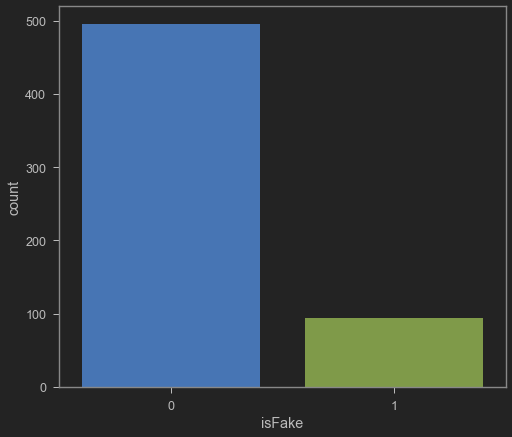

In [536]:
sns.countplot(instagram_df_train['isFake'])


C:\Users\yashu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='userIsPrivate', ylabel='count'>

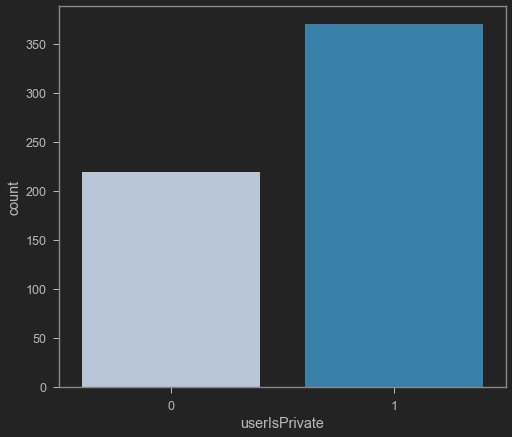

In [537]:
sns.countplot(instagram_df_train['userIsPrivate'],palette = "PuBu")

C:\Users\yashu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='userHasProfilPic', ylabel='count'>

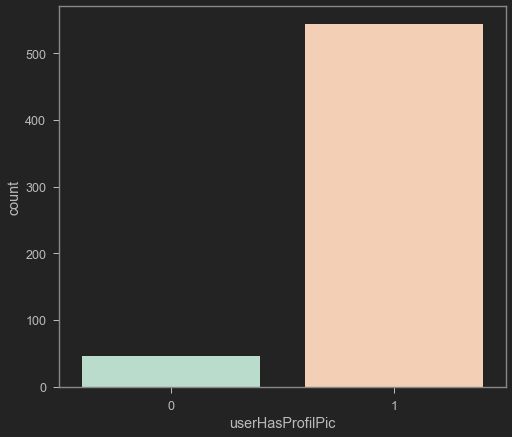

In [538]:
sns.countplot(instagram_df_train['userHasProfilPic'],palette = "Pastel2")

C:\Users\yashu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='usernameLength', ylabel='Density'>

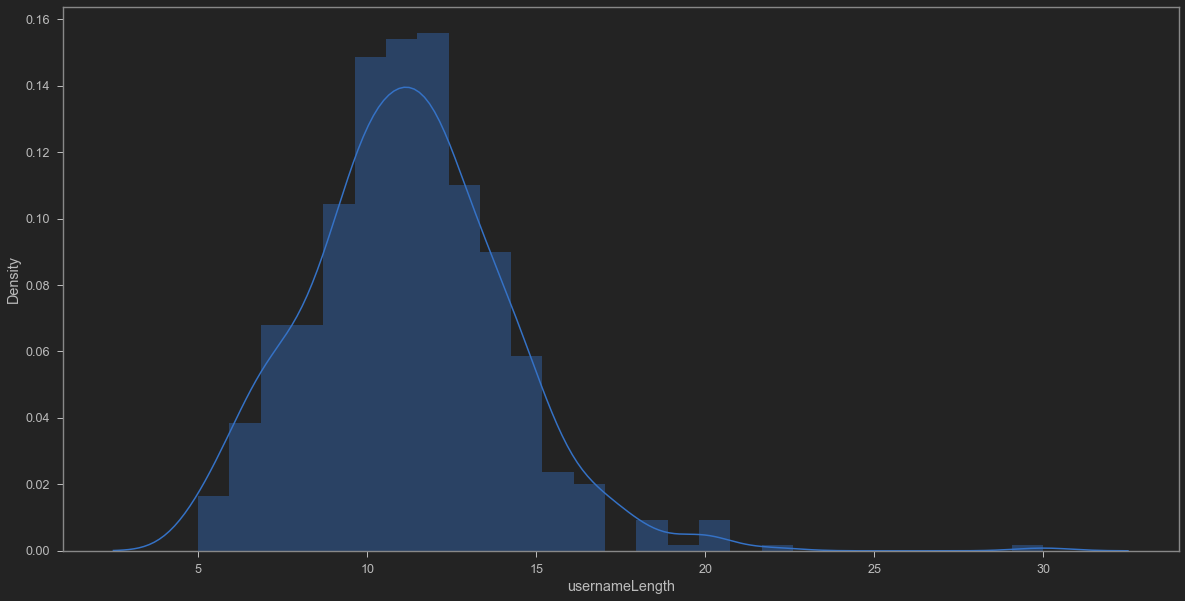

In [539]:
plt.figure(figsize = (20, 10))
sns.distplot(instagram_df_train['usernameLength'],kde=True)

<AxesSubplot:>

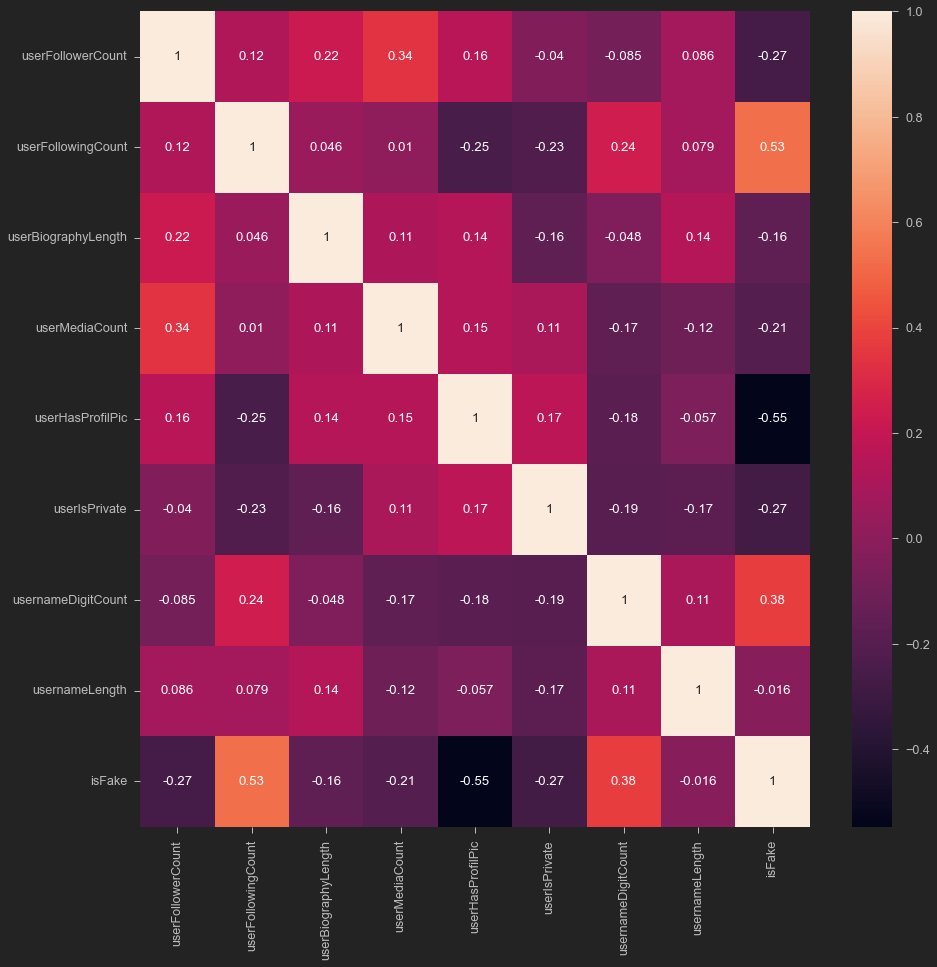

In [540]:
plt.figure(figsize=(15,15))
cm = instagram_df_train.corr()
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)

C:\Users\yashu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='isFake', ylabel='count'>

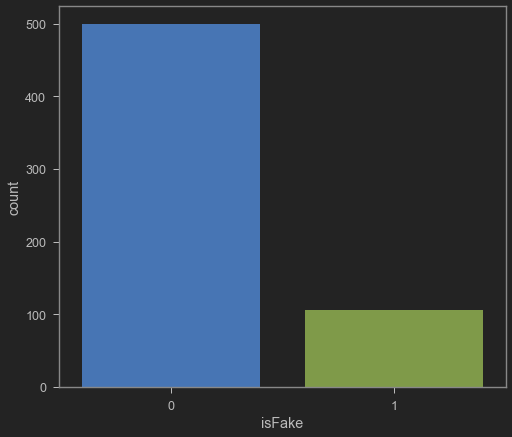

In [541]:
sns.countplot(instagram_df_test['isFake'])


C:\Users\yashu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='userIsPrivate', ylabel='count'>

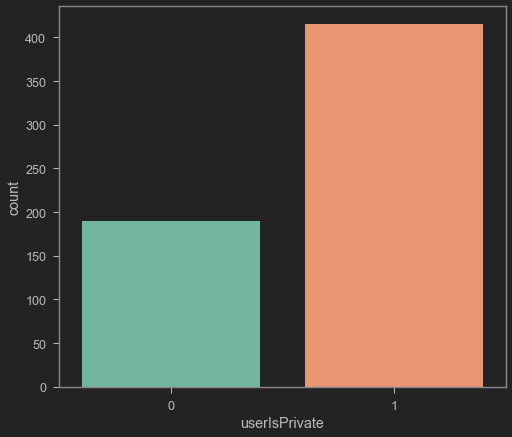

In [542]:
sns.countplot(instagram_df_test['userIsPrivate'],palette = "Set2")

C:\Users\yashu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='userHasProfilPic', ylabel='count'>

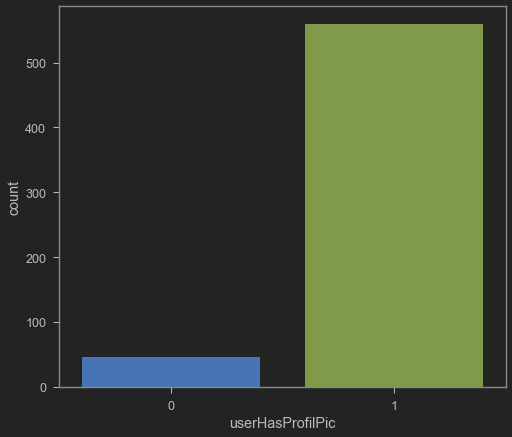

In [543]:
sns.countplot(instagram_df_test['userHasProfilPic'])

In [544]:
x_train = instagram_df_train.drop(columns = ['isFake'])
x_test = instagram_df_test.drop(columns = ['isFake'])
x_train

,userFollowerCount,userFollowingCount,userBiographyLength,userMediaCount,userHasProfilPic,userIsPrivate,usernameDigitCount,usernameLength
0,25,1937,0,0,1,1,0,10
1,324,4122,0,0,1,0,4,15
2,15,399,0,0,0,0,3,12
3,14,107,0,1,1,0,1,10
4,264,4651,0,0,1,0,0,14
...,...,...,...,...,...,...,...,...
584,239,1134,145,9,1,0,0,19
585,91,149,0,7,1,0,0,18
586,78,783,28,1,1,0,0,11
587,135,517,44,4,1,0,4,11


In [545]:
x_test

,userFollowerCount,userFollowingCount,userBiographyLength,userMediaCount,userHasProfilPic,userIsPrivate,usernameDigitCount,usernameLength
0,15,3949,0,0,0,0,2,13
1,26,3400,0,0,0,0,2,8
2,32,3921,70,0,1,0,2,11
3,34,7158,0,0,0,0,1,10
4,47,3999,129,0,1,1,0,12
...,...,...,...,...,...,...,...,...
600,270,493,0,0,1,0,0,13
601,427,981,20,95,1,1,2,13
602,386,482,32,48,1,1,0,7
603,65,67,79,116,1,0,0,8


In [546]:
y_train = instagram_df_train['isFake']
y_test = instagram_df_test['isFake']
y_train

0      1
1      1
2      1
3      1
4      1
      ..
584    0
585    0
586    0
587    0
588    0
Name: isFake, Length: 589, dtype: int64

In [547]:
y_test

0      1
1      1
2      1
3      1
4      1
      ..
600    0
601    0
602    0
603    0
604    0
Name: isFake, Length: 605, dtype: int64

In [548]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(x_train)
X_test = scaler_x.transform(x_test)

In [549]:
Y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
Y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)

In [550]:
X_train.shape,X_test.shape

((589, 8), (605, 8))

In [551]:
Y_train.shape,Y_test.shape

((589, 2), (605, 2))

In [552]:
Training_data_percentage = len(X_train)/(len(X_train) + len(X_test) ) * 100
Training_data_percentage

49.32998324958124

In [553]:
Testing_data_percentage = len(X_test)/(len(X_train) + len(X_test) ) * 100
Testing_data_percentage

50.67001675041875

In [554]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

#Building the main model***

model = Sequential() 
model.add(Dense(50,input_dim = 8, activation = "relu")) #Initial Layer
model.add(Dropout(0.3))
model.add(Dense(150, activation = "relu"))
model.add(Dropout(0.3))
model.add(Dense(25, activation = "relu"))
model.add(Dropout(0.3))
model.add(Dense(2, activation = "softmax")) #output layer

model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 50)                450       
_________________________________________________________________
dropout_36 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_49 (Dense)             (None, 150)               7650      
_________________________________________________________________
dropout_37 (Dropout)         (None, 150)               0         
_________________________________________________________________
dense_50 (Dense)             (None, 25)                3775      
_________________________________________________________________
dropout_38 (Dropout)         (None, 25)                0         
_________________________________________________________________
dense_51 (Dense)             (None, 2)               

In [555]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [556]:
epochs_hist = model.fit(X_train, Y_train, epochs = 20, verbose = 1, validation_split = 0.1)

Epoch 1/20
17/17 [==============================] - 1s 10ms/step - loss: 0.6419 - accuracy: 0.6717 - val_loss: 0.3881 - val_accuracy: 0.9661
Epoch 2/20
17/17 [==============================] - 0s 3ms/step - loss: 0.4206 - accuracy: 0.8585 - val_loss: 0.2535 - val_accuracy: 0.9492
Epoch 3/20
17/17 [==============================] - 0s 3ms/step - loss: 0.3001 - accuracy: 0.8962 - val_loss: 0.2883 - val_accuracy: 0.9322
Epoch 4/20
17/17 [==============================] - 0s 3ms/step - loss: 0.2259 - accuracy: 0.9094 - val_loss: 0.2365 - val_accuracy: 0.9492
Epoch 5/20
17/17 [==============================] - 0s 3ms/step - loss: 0.2201 - accuracy: 0.9321 - val_loss: 0.2365 - val_accuracy: 0.9322
Epoch 6/20
17/17 [==============================] - 0s 3ms/step - loss: 0.2074 - accuracy: 0.9415 - val_loss: 0.2624 - val_accuracy: 0.9322
Epoch 7/20
17/17 [==============================] - 0s 3ms/step - loss: 0.1886 - accuracy: 0.9396 - val_loss: 0.2218 - val_accuracy: 0.9322
Epoch 8/20
17/17 [=

In [557]:
print(epochs_hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


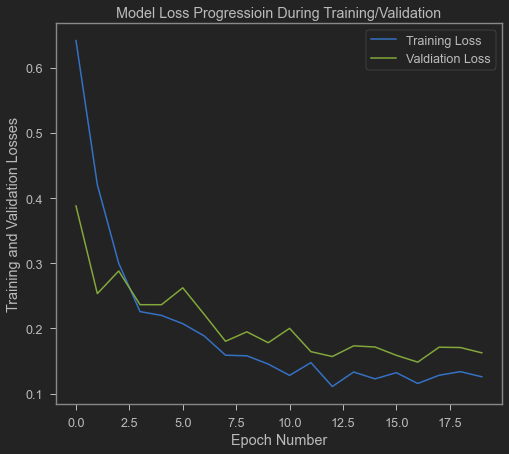

In [558]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])

plt.title('Model Loss Progressioin During Training/Validation')
plt.xlabel('Epoch Number')
plt.ylabel('Training and Validation Losses')
plt.legend(['Training Loss','Valdiation Loss'])

In [559]:
predicted = model.predict(X_test)

In [560]:
predicted_value = []
test = []
for i in predicted:
    predicted_value.append(np.argmax(i))

for i in Y_test:
    test.append(np.argmax(i))

In [561]:
print(classification_report(test, predicted_value))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       499
           1       0.90      0.70      0.79       106

    accuracy                           0.93       605
   macro avg       0.92      0.84      0.87       605
weighted avg       0.93      0.93      0.93       605



<AxesSubplot:>

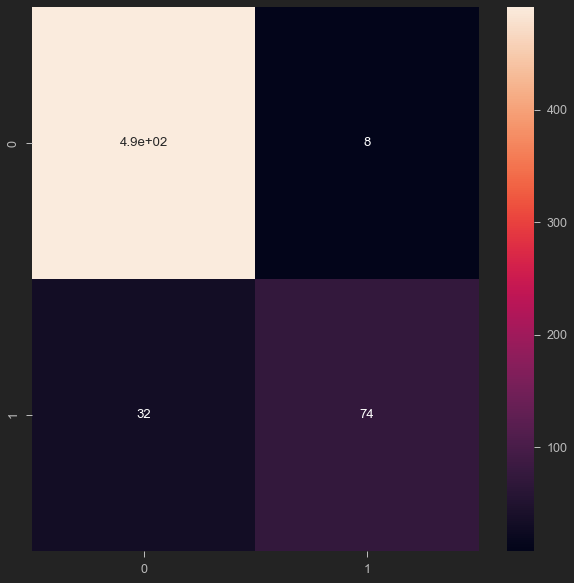

In [562]:
plt.figure(figsize=(10, 10))
con_matrix = confusion_matrix(test,predicted_value)
sns.heatmap(con_matrix, annot=True)